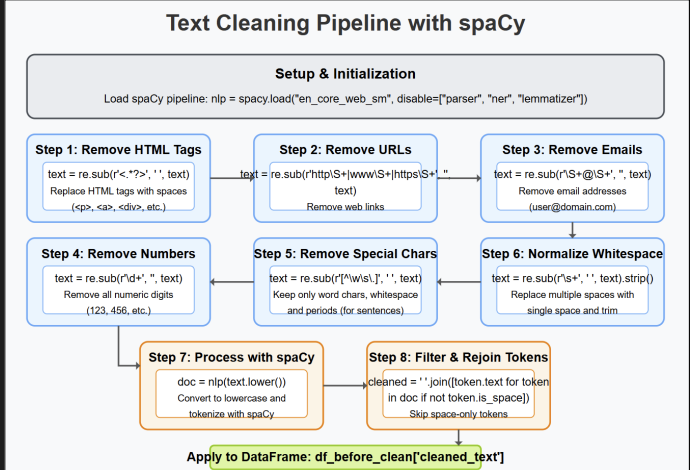

In [ ]:
# Mounting the drive to load the data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/NLP assignment3/'

/content/drive/MyDrive/NLP assignment3


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/NLP assignment3/fomc_minutes_2015_2025_clean.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Content'])


In [ ]:
!pip install vaderSentiment

In [ ]:
import re
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "lemmatizer"])

def clean_text(text):
    text = re.sub(r"<.*?>", '', text)  # remove HTML
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # remove emails
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r"[^\w\s.]", ' ', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
    doc = nlp(text.lower())
    return ' '.join([token.text for token in doc if not token.is_space])

df['cleaned_text'] = df['Content'].apply(clean_text)

In [ ]:
# Save to drive
output_path_cleaned = "/content/drive/My Drive/NLP assignment3/fomc_transcripts_spacy_cleaned.csv"
df.to_csv(output_path_cleaned, index=False)
print(f"\n Cleaned data saved to {output_path_cleaned}")



 Cleaned data saved to /content/drive/My Drive/NLP assignment3/fomc_transcripts_spacy_cleaned.csv


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df[['neg', 'neu', 'pos', 'compound']] = df['cleaned_text'].apply(
    lambda x: pd.Series(analyzer.polarity_scores(x))
)


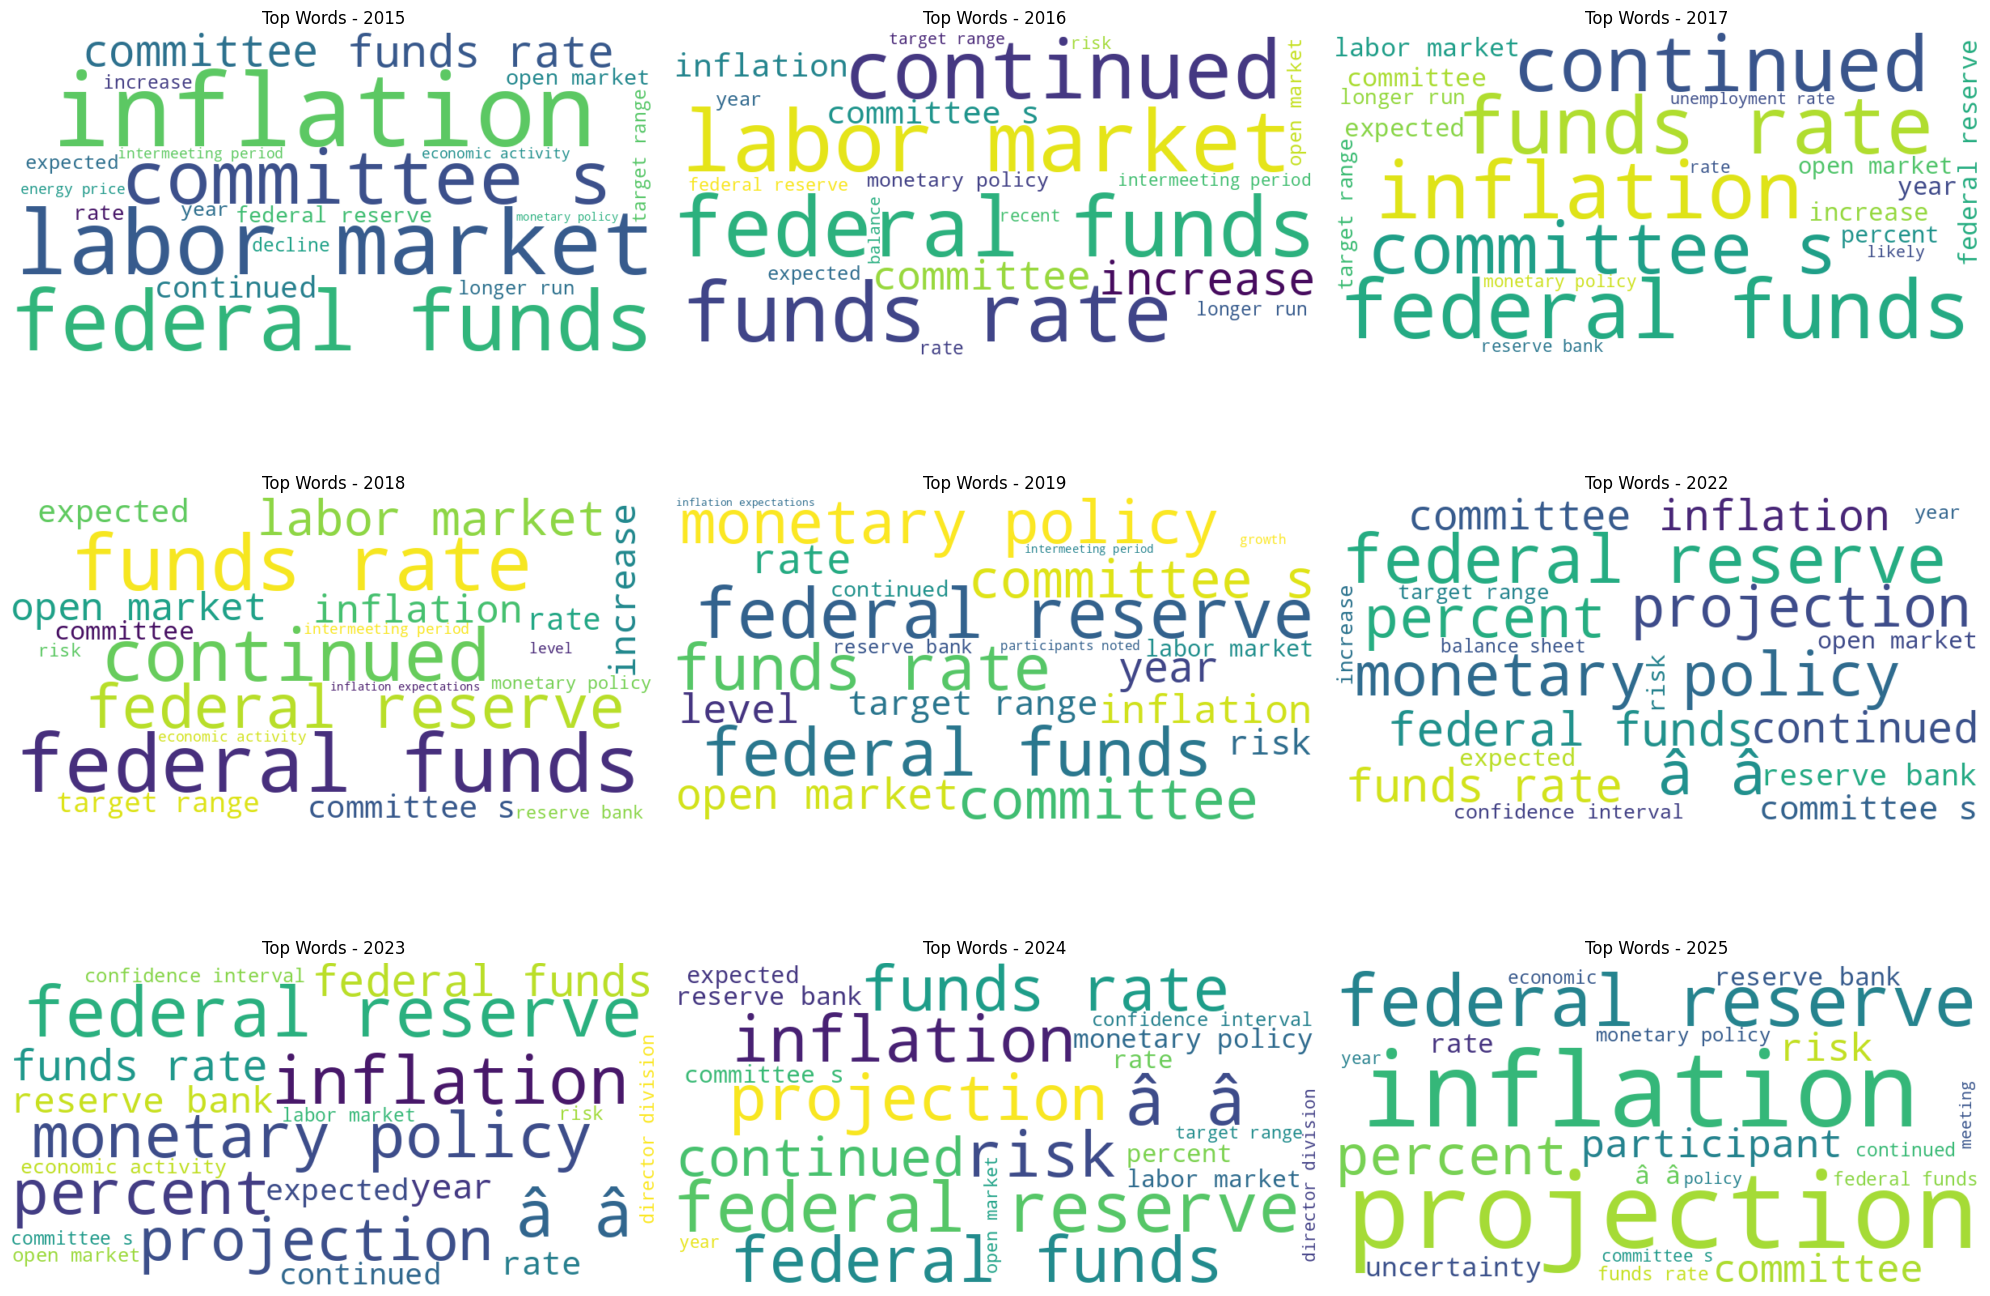

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd # import pandas if not already done

# Assuming your sentiment analysis results are in 'df' from previous steps:
df_sentiment = df.copy() # Assign df to df_sentiment

# Rest of the code

years = sorted(df_sentiment['Date'].dt.year.unique())
years = [year for year in years if year not in [2020, 2021]]

fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

for i, year in enumerate(years[:9]):
    text = " ".join(df_sentiment[df_sentiment['Date'].dt.year == year]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=20).generate(text)
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f"Top Words - {year}")

plt.tight_layout()
plt.show()

In [ ]:
df_sentiment.to_csv("fomc_sentiment_cleaned.csv", index=False)


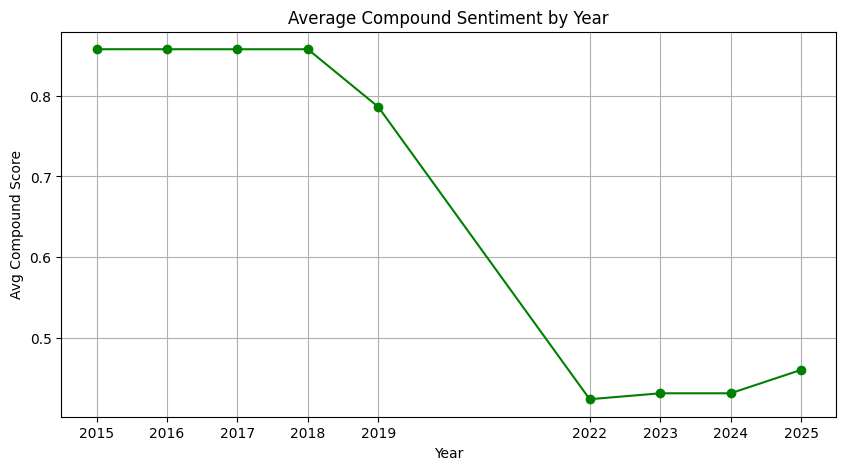

In [ ]:
df_sentiment['Year'] = df_sentiment['Date'].dt.year
yearly_sentiment = df_sentiment.groupby('Year')['compound'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_sentiment['Year'], yearly_sentiment['compound'], marker='o', color='green')
plt.title("Average Compound Sentiment by Year")
plt.xlabel("Year")
plt.ylabel("Avg Compound Score")
plt.grid(True)
plt.xticks(yearly_sentiment['Year'])
plt.show()


In [ ]:
import spacy

# Use built-in stopword list and tokenizer
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def spacy_tokenize(text):
    doc = nlp(text)
    return [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha and len(token) > 2
    ]

df_sentiment['tokens'] = df_sentiment['cleaned_text'].apply(spacy_tokenize)


In [ ]:
!pip install numpy --upgrade --force-reinstall
!pip install gensim --upgrade --force-reinstall

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (

In [ ]:
!pip install --upgrade scipy
!pip install --upgrade gensim

  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2


In [ ]:

from gensim import corpora

# Create dictionary and corpus
dictionary = corpora.Dictionary(df_sentiment['tokens'])
corpus = [dictionary.doc2bow(text) for text in df_sentiment['tokens']]

In [ ]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10,
    per_word_topics=True
)


In [ ]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.040*"projection" + 0.020*"rate" + 0.017*"uncertainty" + 0.016*"federal" + 0.016*"confidence" + 0.015*"interval" + 0.015*"participant" + 0.015*"year" + 0.013*"forecast" + 0.012*"fund"')
(1, '0.018*"inflation" + 0.016*"rate" + 0.016*"market" + 0.013*"committee" + 0.011*"federal" + 0.010*"economic" + 0.010*"percent" + 0.010*"increase" + 0.009*"continue" + 0.009*"participant"')
(2, '0.030*"release" + 0.028*"pdf" + 0.024*"key" + 0.024*"toggle" + 0.020*"html" + 0.017*"market" + 0.016*"open" + 0.016*"arrow" + 0.016*"video" + 0.016*"calendar"')
(3, '0.015*"market" + 0.015*"committee" + 0.014*"rate" + 0.014*"inflation" + 0.013*"participant" + 0.013*"federal" + 0.011*"bank" + 0.010*"policy" + 0.009*"reserve" + 0.008*"remain"')
(4, '0.017*"rate" + 0.017*"inflation" + 0.016*"market" + 0.012*"federal" + 0.012*"participant" + 0.011*"economic" + 0.011*"policy" + 0.010*"committee" + 0.008*"price" + 0.008*"remain"')


In [ ]:
def get_dominant_topic(ldamodel, bow):
    topic_probs = ldamodel.get_document_topics(bow)
    return sorted(topic_probs, key=lambda x: -x[1])[0][0] if topic_probs else -1

df_sentiment['topic'] = [get_dominant_topic(lda_model, doc) for doc in corpus]


In [ ]:
import plotly.express as px

df_sentiment['Year'] = df_sentiment['Date'].dt.year
topic_trend = df_sentiment.groupby(['Year', 'topic']).size().unstack(fill_value=0)
topic_trend_pct = topic_trend.div(topic_trend.sum(axis=1), axis=0).reset_index()

# Melt for Plotly
df_melt = topic_trend_pct.melt(id_vars='Year', var_name='Topic', value_name='Proportion')

fig = px.line(df_melt, x='Year', y='Proportion', color='Topic',
              markers=True, title="📊 Topic Trends Over Time (2015–2025)",
              labels={"Proportion": "Document Share"})
fig.update_layout(xaxis=dict(dtick=1))
fig.show()


In [ ]:
avg_sentiment = df_sentiment.groupby('topic')['compound'].mean().reset_index()

fig = px.bar(avg_sentiment, x='topic', y='compound', text='compound',
             color='compound', color_continuous_scale='RdYlGn',
             title="Average Compound Sentiment per Topic",
             labels={"compound": "Avg Sentiment (Compound)", "topic": "LDA Topic"})

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


In [ ]:
topic_count = df_sentiment.groupby(['Year', 'topic']).size().reset_index(name='Count')

fig = px.bar(topic_count, x='Year', y='Count', color='topic',
             title="🧱 Topic Distribution by Year (Stacked)",
             labels={'topic': 'LDA Topic', 'Count': 'Number of Documents'},
             barmode='stack')

fig.update_layout(xaxis=dict(dtick=1))
fig.show()


In [ ]:
sentiment_by_year = df_sentiment.groupby(['Year', 'topic'])['compound'].mean().reset_index()

fig = px.bar(sentiment_by_year, x='Year', y='compound', color='topic',
             title="📉 Average Sentiment per Topic by Year",
             labels={'compound': 'Avg Compound Sentiment'},
             barmode='group')

fig.update_layout(xaxis=dict(dtick=1))
fig.show()


In [ ]:
topic_words = []
for t in range(lda_model.num_topics):
    words = lda_model.show_topic(t, topn=10)
    for word, prob in words:
        topic_words.append({'Topic': t, 'Word': word, 'Probability': prob})

topic_words_df = pd.DataFrame(topic_words)

fig = px.bar(topic_words_df, x='Word', y='Probability', facet_col='Topic',
             title="🔤 Top 10 Words per Topic", color='Probability',
             color_continuous_scale='Blues')

fig.update_layout(showlegend=False)
fig.show()


Create Bigrams and Trigrams

In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Create bigram and trigram models
bigram = Phrases(df_sentiment['tokens'], min_count=5, threshold=10)
trigram = Phrases(bigram[df_sentiment['tokens']], threshold=10)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply them
def make_ngrams(texts):
    return trigram_mod[bigram_mod[texts]]

df_sentiment['ngrams'] = df_sentiment['tokens'].apply(make_ngrams)


Rebuild Dictionary and Corpus for LDA



In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(df_sentiment['ngrams'])
corpus = [dictionary.doc2bow(text) for text in df_sentiment['ngrams']]


Re-train LDA Model with N-grams

In [ ]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10,
    per_word_topics=True
)


Visualize Top Bigrams/Trigrams per Topic

In [ ]:
topic_phrases = []
for t in range(lda_model.num_topics):
    words = lda_model.show_topic(t, topn=10)
    for word, prob in words:
        topic_phrases.append({'Topic': t, 'Phrase': word, 'Probability': prob})

df_topic_phrases = pd.DataFrame(topic_phrases)

import plotly.express as px
fig = px.bar(df_topic_phrases, x='Phrase', y='Probability', facet_col='Topic',
             title="📚 Top Bigrams/Trigrams per Topic (LDA with N-Grams)",
             color='Probability', color_continuous_scale='Blues')
fig.update_layout(showlegend=False)
fig.show()


Extract Trigrams from Cleaned Text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Use CountVectorizer to extract trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_sentiment['cleaned_text'])

# Add trigram frequencies to DataFrame
trigram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
trigram_df['Month'] = df_sentiment['Date'].dt.to_period('M').astype(str)


Aggregate Monthly Trigram Frequency



In [ ]:
# Group by month to get monthly trigram totals
monthly_counts = trigram_df.groupby('Month').sum().T  # Transpose for trigram rows

# Select top 10 most frequent overall trigrams
top_trigrams = monthly_counts.sum(axis=1).nlargest(10).index
ranked = monthly_counts.loc[top_trigrams]


Convert Frequencies to Ranks

In [ ]:
# Convert each column (month) to ranks (1 = most frequent)
rank_df = ranked.rank(ascending=False, axis=0, method='min').T.reset_index().melt(
    id_vars='Month', var_name='Trigram', value_name='Rank')

# Convert Month to datetime for sorting
rank_df['Month'] = pd.to_datetime(rank_df['Month'])


In [ ]:
import plotly.express as px

fig = px.line(rank_df, x='Month', y='Rank', color='Trigram',
              title='📊 Phrase Popularity Rank Shift Over Time (Top 10 Trigrams)',
              labels={'Rank': 'Rank', 'Month': 'Month'},
              markers=True)

# Reverse y-axis since lower rank = higher importance
fig.update_yaxes(autorange='reversed')
fig.update_layout(height=500)
fig.show()
